# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
lon=[]
lat=[]
max_t=[]
hum=[]
cloud=[]
wind_s=[]
country=[]
date=[]
cities2=[]

count1=1
count2=1

print('Beginning Data Retrieval')
print('_'*20)

for city in cities:
    
    if count1%50==0:
        time.sleep(55)
        count2=count2+1
        count1=1

    url=f" http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    try:
        result=requests.get(url).json()

        print(f'Processing Record {count1} of Set {count2} | {city}')       
        
        count1=count1+1
        
        cities2.append(result['name'])
        lat.append(result['coord']['lat'])
        lon.append(result['coord']['lon'])
        max_t.append(result['main']['temp_max'])
        hum.append(result['main']['humidity'])
        cloud.append(result['clouds']['all'])
        wind_s.append(result['wind']['speed'])
        country.append(result['sys']['country'])
        date.append(result['dt'])
    except:
        print('City not found skipping')


Beginning Data Retrieval
____________________
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | sinnamary
Processing Record 3 of Set 1 | rosario oeste
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | ulladulla
Processing Record 6 of Set 1 | copperas cove
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | kokopo
Processing Record 10 of Set 1 | urdzhar
City not found skipping
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | barentsburg
City not found skipping
Processing Record 14 of Set 1 | tarko-sale
Processing Record 15 of Set 1 | goba
Processing Record 16 of Set 1 | tasiilaq
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | pangkalanbuun
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | yar-sale
Processing Record 21 of Set 1 | presidente medici
Processing Record 22 of Set 

Processing Record 42 of Set 4 | sampit
Processing Record 43 of Set 4 | harper
Processing Record 44 of Set 4 | sinjar
Processing Record 45 of Set 4 | altoona
Processing Record 46 of Set 4 | rawson
Processing Record 47 of Set 4 | eureka
Processing Record 48 of Set 4 | pacifica
Processing Record 49 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | sur
Processing Record 2 of Set 5 | asyut
Processing Record 3 of Set 5 | isangel
Processing Record 4 of Set 5 | safford
Processing Record 5 of Set 5 | koboldo
City not found skipping
Processing Record 6 of Set 5 | sumbawa
City not found skipping
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | dickinson
Processing Record 9 of Set 5 | ribeira grande
Processing Record 10 of Set 5 | marystown
Processing Record 11 of Set 5 | gokak
Processing Record 12 of Set 5 | sananduva
Processing Record 13 of Set 5 | pochutla
Processing Record 14 of Set 5 | zhangye
Processing Record 15 of Set 5 | looc
Processing Record 16 of Set 5 | 

Processing Record 36 of Set 8 | taltal
Processing Record 37 of Set 8 | dali
Processing Record 38 of Set 8 | amuntai
Processing Record 39 of Set 8 | katherine
Processing Record 40 of Set 8 | villa de reyes
Processing Record 41 of Set 8 | santo angelo
Processing Record 42 of Set 8 | tukrah
Processing Record 43 of Set 8 | gaoual
Processing Record 44 of Set 8 | erzurum
Processing Record 45 of Set 8 | neijiang
Processing Record 46 of Set 8 | baie-comeau
Processing Record 47 of Set 8 | lamar
Processing Record 48 of Set 8 | kovur
Processing Record 49 of Set 8 | kudahuvadhoo
Processing Record 1 of Set 9 | flin flon
Processing Record 2 of Set 9 | keti bandar
Processing Record 3 of Set 9 | nueve de julio
Processing Record 4 of Set 9 | warqla
City not found skipping
Processing Record 5 of Set 9 | vanimo
Processing Record 6 of Set 9 | korsakov
Processing Record 7 of Set 9 | kalemie
Processing Record 8 of Set 9 | sant julia de loria
Processing Record 9 of Set 9 | suntar
Processing Record 10 of Set 

Processing Record 29 of Set 12 | achisay
City not found skipping
Processing Record 30 of Set 12 | faya
Processing Record 31 of Set 12 | kazachinskoye
Processing Record 32 of Set 12 | whitehorse
Processing Record 33 of Set 12 | puerto del rosario
Processing Record 34 of Set 12 | west wendover
Processing Record 35 of Set 12 | hervey bay
Processing Record 36 of Set 12 | angoche
Processing Record 37 of Set 12 | sokyryany
Processing Record 38 of Set 12 | santiago tuxtla
Processing Record 39 of Set 12 | nishihara
Processing Record 40 of Set 12 | kananga
Processing Record 41 of Set 12 | armacao dos buzios
City not found skipping
Processing Record 42 of Set 12 | tikrit
Processing Record 43 of Set 12 | havoysund
Processing Record 44 of Set 12 | kurilsk
Processing Record 45 of Set 12 | tevaitoa
Processing Record 46 of Set 12 | ihosy
Processing Record 47 of Set 12 | arlit
Processing Record 48 of Set 12 | gwadar
Processing Record 49 of Set 12 | egvekinot
Processing Record 1 of Set 13 | marquette
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
data=pd.DataFrame({
 'City':cities2,
 'Lat':lat,
 'Lng':lon,
 'Max Temp':max_t,
'Humidity':hum,
'Cloudiness':cloud,
'Wind Speed':wind_s,
'Country':country,
'Date':date})

In [29]:
data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,266.48,43,100,1.28,US,1613276137
1,Sinnamary,5.3833,-52.9500,298.53,83,95,6.88,GF,1613276137
2,Rosário Oeste,-14.8361,-56.4275,295.71,91,98,1.65,BR,1613276137
3,Port Lincoln,-34.7333,135.8667,292.42,61,72,6.23,AU,1613276138
4,Ulladulla,-35.3500,150.4667,296.15,60,40,6.69,AU,1613276138


In [30]:
data.to_csv(output_data_file,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
data.describe(percentiles=[.25,.5,.75])

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,20.177882,18.714371,282.695628,73.530973,54.594690,3.561062,1.613277e+09
std,32.293185,90.800127,17.962316,18.626923,40.055462,2.569422,2.641113e+02
min,-54.800000,-179.166700,235.970000,18.000000,0.000000,0.440000,1.613276e+09
25%,-5.089200,-63.057800,270.260000,65.000000,8.000000,1.570000,1.613276e+09
50%,24.687700,25.993100,289.820000,78.000000,69.000000,3.090000,1.613277e+09
75%,45.523400,98.517400,297.040000,88.000000,93.000000,4.920000,1.613277e+09
max,78.218600,178.416700,308.150000,100.000000,100.000000,19.550000,1.613277e+09


In [32]:
#  Get the indices of cities that have humidity over 100%.
cl=data['Humidity']<100

In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
data=data[cl]

In [34]:
data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,266.48,43,100,1.28,US,1613276137
1,Sinnamary,5.3833,-52.9500,298.53,83,95,6.88,GF,1613276137
2,Rosário Oeste,-14.8361,-56.4275,295.71,91,98,1.65,BR,1613276137
3,Port Lincoln,-34.7333,135.8667,292.42,61,72,6.23,AU,1613276138
4,Ulladulla,-35.3500,150.4667,296.15,60,40,6.69,AU,1613276138


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [13]:
list(data)

['Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed',
 'Country',
 'Date']

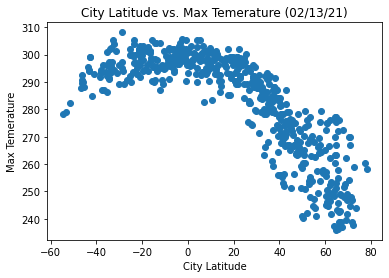

In [38]:
%matplotlib inline
plt.scatter(data['Lat'],data['Max Temp'])
plt.xlabel('City Latitude')
plt.ylabel('Max Temerature')
plt.title(f'City Latitude vs. Max Temerature (02/13/21)')
plt.show()

## Latitude vs. Humidity Plot

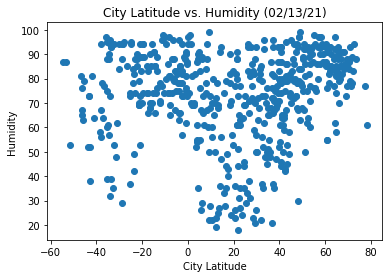

In [39]:
plt.scatter(data['Lat'],data['Humidity'])
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs. Humidity (02/13/21)')
plt.show()

## Latitude vs. Cloudiness Plot

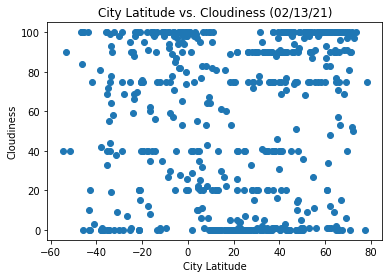

In [40]:
plt.scatter(data['Lat'],data['Cloudiness'])
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs. Cloudiness (02/13/21)')
plt.show()

## Latitude vs. Wind Speed Plot

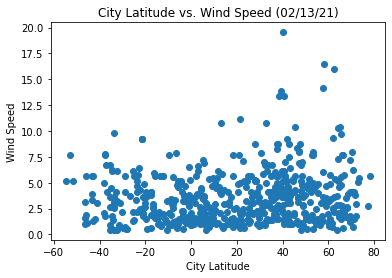

In [41]:
plt.scatter(data['Lat'],data['Wind Speed'])
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs. Wind Speed (02/13/21)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [46]:
y='Max Temp'

cl=data['Lat']>0

y_values=data[y][cl]

x_values=data['Lat'][cl]

R squared: 0.7491134927927836


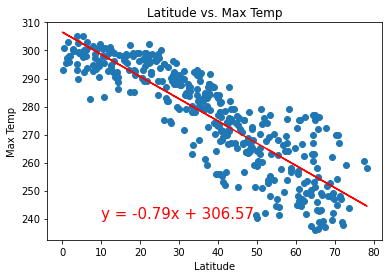

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs. '+y)
plt.xlabel('Latitude')
plt.ylabel(y)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.23504931755584074


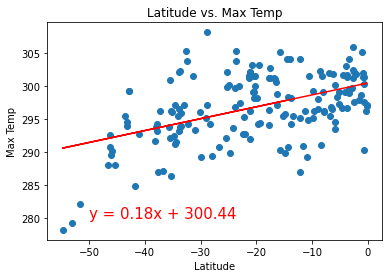

In [51]:
y='Max Temp'

cl=data['Lat']<0

y_values=data[y][cl]

x_values=data['Lat'][cl]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,280),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs. '+y)
plt.xlabel('Latitude')
plt.ylabel(y)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.15852259768962002


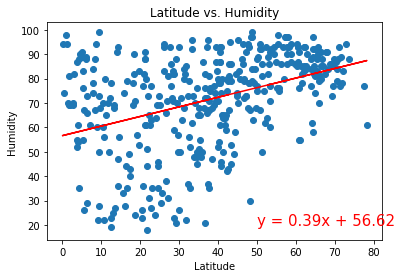

In [54]:
y='Humidity'

cl=data['Lat']>0

y_values=data[y][cl]

x_values=data['Lat'][cl]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs. '+y)
plt.xlabel('Latitude')
plt.ylabel(y)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


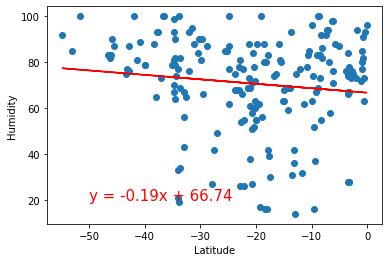

In [28]:
y='Humidity'

cl=data['Lat']<0

y_values=data[y][cl]

x_values=data['Lat'][cl]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,280),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs. '+y)
plt.xlabel('Latitude')
plt.ylabel(y)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.09057435514209104


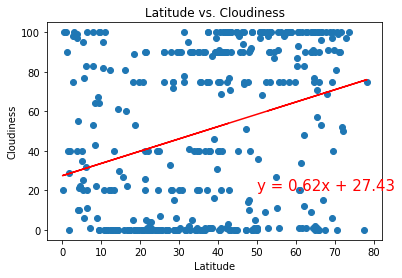

In [56]:
y='Cloudiness'

cl=data['Lat']>0

y_values=data[y][cl]

x_values=data['Lat'][cl]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs. '+y)
plt.xlabel('Latitude')
plt.ylabel(y)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.10101089366828966


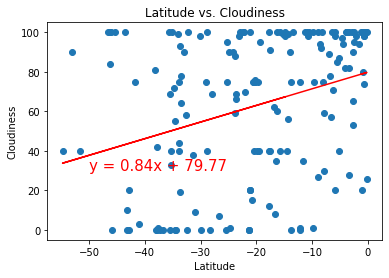

In [58]:
y='Cloudiness'

cl=data['Lat']<0

y_values=data[y][cl]

x_values=data['Lat'][cl]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs. '+y)
plt.xlabel('Latitude')
plt.ylabel(y)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.014176682516165606


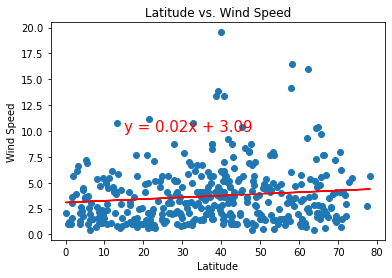

In [60]:
y='Wind Speed'

cl=data['Lat']>0

y_values=data[y][cl]

x_values=data['Lat'][cl]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs. '+y)
plt.xlabel('Latitude')
plt.ylabel(y)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.024457171045339034


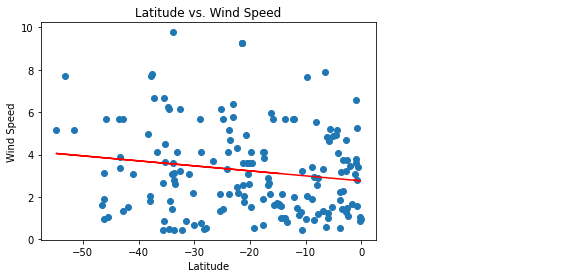

In [61]:
y='Wind Speed'

cl=data['Lat']<0

y_values=data[y][cl]

x_values=data['Lat'][cl]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")

# Label plot
plt.title('Latitude vs. '+y)
plt.xlabel('Latitude')
plt.ylabel(y)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()